# Description

TODO

# Modules loading

In [1]:
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from clustermatch import conf

# Settings

In [ ]:
DATASET_CONFIG = conf.GTEX

In [2]:
# ENRICH_FUNCTION = "enrichGO"

In [3]:
# CORRELATION_METHOD_NAME = "clustermatch"

In [4]:
# GENE_SELECTION_STRATEGY = "var_pc_log2"

In [5]:
# # clusterProfiler settings
# ENRICH_FUNCTION = "enrichGO"
# SIMPLIFY_CUTOFF = 0.7
# GO_ONTOLOGIES = ("BP", "CC", "MF")

In [6]:
# SIMILARITY_MATRICES_DIR = conf.GTEX["SIMILARITY_MATRICES_DIR"]
# display(SIMILARITY_MATRICES_DIR)

In [7]:
# SIMILARITY_MATRIX_FILENAME_TEMPLATE = conf.GTEX["SIMILARITY_MATRIX_FILENAME_TEMPLATE"]
# display(SIMILARITY_MATRIX_FILENAME_TEMPLATE)

# Paths

In [8]:
INPUT_FILE = DATASET_CONFIG["CLUSTERING_COMBINED_FILE"]
display(INPUT_FILE)
assert INPUT_FILE.exists()

PosixPath('/home/miltondp/projects/labs/greenelab/clustermatch_repos/clustermatch-gene-expr/base/results/gtex_v8/clustering/gtex_v8_data-clustering.pkl')

# Load data

In [9]:
df = pd.read_pickle(INPUT_FILE)

In [10]:
df.shape

(750, 8)

In [11]:
df["tissue"].unique()

['adipose_subcutaneous', 'artery_tibial', 'muscle_skeletal', 'skin_sun_exposed_lower_leg', 'whole_blood']
Categories (5, object): ['adipose_subcutaneous', 'artery_tibial', 'muscle_skeletal', 'skin_sun_exposed_lower_leg', 'whole_blood']

In [12]:
df["corr_method"].unique()

['clustermatch', 'clustermatch_k2', 'pearson_abs', 'pearson_full', 'spearman_abs', 'spearman_full']
Categories (6, object): ['clustermatch', 'clustermatch_k2', 'pearson_abs', 'pearson_full', 'spearman_abs', 'spearman_full']

In [13]:
5 * 6 * 25

750

In [14]:
with pd.option_context(
    "display.max_rows", None, "display.max_columns", None, "display.max_colwidth", None
):
    tmp = df.head()
    display(tmp)

,id,n_clusters,partition,si_score,tissue,gene_sel_strategy,corr_method,clust_method
0,SpectralClustering #0,2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, ...]",0.025231,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering
1,SpectralClustering #1,5,"[4, 0, 4, 1, 0, 0, 0, 4, 0, 4, 0, 4, 1, 4, 0, 4, 3, 3, 3, 3, 1, 3, 0, 4, 4, 0, 0, 3, 4, 2, 3, 0, 4, 0, 4, 4, 0, 2, 4, 4, 3, 4, 4, 0, 3, 0, 3, 3, 3, 0, 0, 3, 4, 4, 0, 3, 3, 3, 0, 0, 3, 4, 3, 3, 4, 4, 0, 0, 4, 0, 4, 0, 0, 4, 3, 3, 2, 0, 4, 0, 0, 4, 3, 0, 4, 3, 4, 3, 0, 3, 3, 0, 2, 0, 1, 0, 4, 0, 3, 4, ...]",0.026704,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering
2,SpectralClustering #2,10,"[1, 1, 6, 1, 9, 5, 5, 5, 9, 5, 1, 1, 6, 9, 9, 1, 2, 2, 2, 2, 0, 8, 9, 1, 5, 9, 9, 2, 6, 3, 8, 9, 6, 6, 5, 6, 6, 3, 6, 5, 2, 1, 6, 1, 2, 1, 2, 2, 2, 1, 1, 2, 5, 6, 6, 2, 2, 8, 6, 9, 2, 6, 2, 2, 5, 5, 6, 6, 5, 9, 6, 9, 1, 6, 2, 2, 3, 9, 6, 6, 1, 6, 2, 9, 6, 8, 5, 2, 1, 2, 8, 9, 3, 1, 7, 6, 5, 9, 2, 6, ...]",0.032722,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering
3,SpectralClustering #3,15,"[0, 0, 13, 10, 1, 10, 13, 10, 14, 12, 13, 10, 10, 1, 14, 1, 2, 2, 2, 2, 6, 9, 1, 5, 12, 1, 14, 2, 1, 3, 9, 14, 10, 1, 12, 1, 1, 3, 1, 1, 2, 13, 1, 10, 2, 14, 2, 2, 2, 0, 13, 2, 10, 1, 1, 2, 2, 11, 1, 8, 2, 1, 2, 2, 12, 12, 10, 10, 1, 14, 10, 14, 13, 1, 2, 2, 3, 8, 1, 1, 8, 1, 2, 1, 10, 9, 12, 2, 13, 2, 9, 1, 3, 0, 6, 1, 12, 8, 2, 1, ...]",0.032060,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering
4,SpectralClustering #4,20,"[15, 0, 7, 18, 4, 15, 15, 15, 11, 8, 18, 13, 18, 4, 11, 4, 3, 3, 3, 3, 17, 10, 4, 7, 8, 4, 11, 3, 4, 2, 10, 11, 4, 4, 8, 4, 4, 2, 4, 4, 3, 9, 4, 18, 3, 11, 3, 3, 3, 0, 18, 3, 15, 4, 4, 3, 3, 19, 4, 6, 3, 4, 3, 3, 8, 8, 18, 18, 7, 18, 15, 11, 15, 4, 3, 3, 2, 6, 4, 4, 6, 4, 3, 4, 18, 10, 8, 3, 18, 3, 10, 4, 2, 0, 17, 4, 8, 6, 3, 4, ...]",0.033032,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering


# SI score by method

In [15]:
# plot_data = df.groupby(["n_clusters", "corr_method", "gene_sel_strategy", "clust_method"])["si_score"].mean().reset_index()

In [16]:
# plot_data.shape

In [17]:
# plot_data.sort_values(["n_clusters", "corr_method"]).head(20)

In [28]:
selected_corr_methods = [
    "clustermatch",
    "clustermatch_k2",
    "spearman_abs",
    "pearson_abs",
]

plot_data = df[
    (np.ones(df.shape[0]).astype(bool)) & (df.corr_method.isin(selected_corr_methods))
]

In [29]:
plot_data.shape

(500, 8)

In [30]:
plot_data.corr_method.unique()

['clustermatch', 'clustermatch_k2', 'pearson_abs', 'spearman_abs']
Categories (6, object): ['clustermatch', 'clustermatch_k2', 'pearson_abs', 'pearson_full', 'spearman_abs', 'spearman_full']

In [31]:
PERFORMANCE_MEASURE = "si_score"
# PERFORMANCE_MEASURE = "rich_factor"
# PERFORMANCE_MEASURE = "fold_enrich"

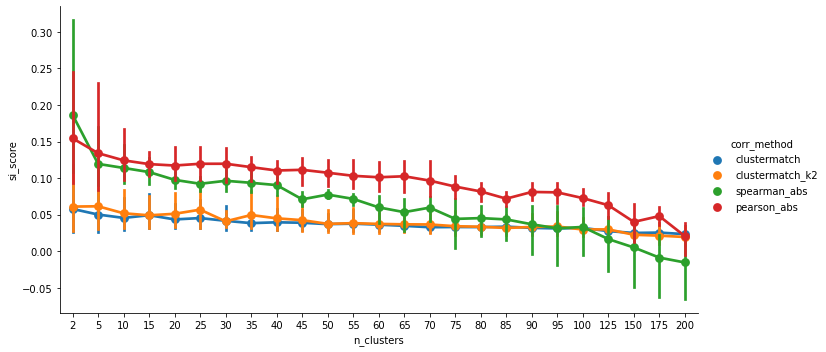

In [32]:
# fig, ax = plt.subplots(figsize=(10, 8))

sns.catplot(
    data=plot_data,
    x="n_clusters",
    y="si_score",
    hue="corr_method",
    hue_order=selected_corr_methods,
    kind="point",
    height=5,
    aspect=2,
    #     ax=ax,
)

# ax.set_xlabel(None)
# # ax.set_ylabel(None)

# min_val = min((quantiles_df.iloc[:, 0].min(), quantiles_df.iloc[:, 1].min()))
# max_val = max((quantiles_df.iloc[:, 0].max(), quantiles_df.iloc[:, 1].max()))
# ax.plot([min_val, max_val], [min_val, max_val], "k", linewidth=0.5)

# ax.set_title(f"Gene Ontology ({PERFORMANCE_MEASURE})")

# Size of clusters

In [33]:
# plot_data = df.groupby(["n_clusters", "corr_method", "gene_sel_strategy", "clust_method"])["si_score"].mean().reset_index()

In [34]:
# plot_data.shape

In [35]:
# plot_data.sort_values(["n_clusters", "corr_method"]).head(20)

In [53]:
plot_data = df[
    (np.ones(df.shape[0]).astype(bool)) & (df.corr_method.isin(selected_corr_methods))
]

In [54]:
plot_data.shape

(500, 8)

In [55]:
plot_data.head()

,id,n_clusters,partition,si_score,tissue,gene_sel_strategy,corr_method,clust_method
0,SpectralClustering #0,2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.025231,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering
1,SpectralClustering #1,5,"[4, 0, 4, 1, 0, 0, 0, 4, 0, 4, 0, 4, 1, 4, 0, ...",0.026704,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering
2,SpectralClustering #2,10,"[1, 1, 6, 1, 9, 5, 5, 5, 9, 5, 1, 1, 6, 9, 9, ...",0.032722,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering
3,SpectralClustering #3,15,"[0, 0, 13, 10, 1, 10, 13, 10, 14, 12, 13, 10, ...",0.032060,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering
4,SpectralClustering #4,20,"[15, 0, 7, 18, 4, 15, 15, 15, 11, 8, 18, 13, 1...",0.033032,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering


In [56]:
pd.Series(plot_data.iloc[0]["partition"]).value_counts().to_dict()

{1: 4364, 0: 636}

In [60]:
from scipy.stats import entropy

In [61]:
entropy([4364, 636])

0.3810291481388292

In [64]:
entropy([4960, 40])

0.046594424222104566

In [71]:
entropy([1 / 2, 1 / 2])

0.6931471805599453

In [69]:
entropy([2500, 2500])

0.6931471805599453

In [76]:
entropy([4364, 636])

0.3810291481388292

In [77]:
_get_max_entropy([4364, 636])

0.6931471805599453

In [78]:
_compute_score([4364, 636])

0.5497088624540352

In [79]:
def _get_partition_stats(part):
    return pd.Series(part).value_counts().to_numpy()


def _get_max_entropy(part_stats):
    n_clusters = len(part_stats)
    return entropy([1 / n_clusters for i in range(n_clusters)])


def _compute_score(part_stats):
    return entropy(part_stats) / _get_max_entropy(part_stats)


plot_data = plot_data.assign(
    partition_stats=plot_data["partition"].apply(_get_partition_stats)
)
plot_data = plot_data.assign(
    cluster_score=plot_data["partition_stats"].apply(_compute_score)
)

In [82]:
plot_data["cluster_score"].describe()

count    500.000000
mean       0.756652
std        0.138835
min        0.031130
25%        0.678384
50%        0.794837
75%        0.850499
max        0.999993
Name: cluster_score, dtype: float64

In [81]:
# plot_data.sort_values(["n_clusters", "corr_method"]).head(20)

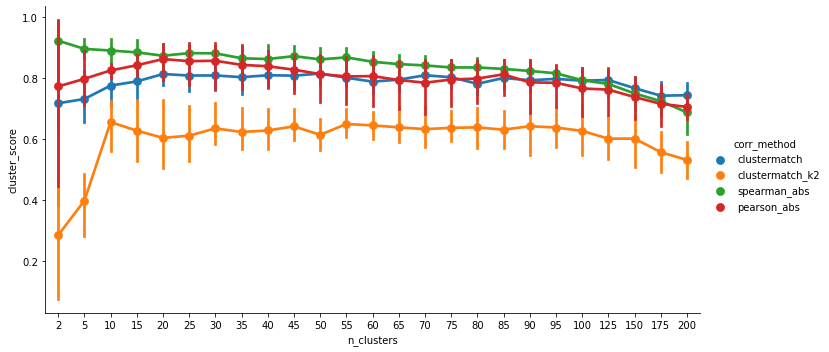

In [86]:
# fig, ax = plt.subplots(figsize=(10, 8))

sns.catplot(
    data=plot_data,
    x="n_clusters",
    y="cluster_score",
    hue="corr_method",
    hue_order=selected_corr_methods,
    kind="point",
    height=5,
    aspect=2,
    #     ax=ax,
)

# ax.set_xlabel(None)
# # ax.set_ylabel(None)

# min_val = min((quantiles_df.iloc[:, 0].min(), quantiles_df.iloc[:, 1].min()))
# max_val = max((quantiles_df.iloc[:, 0].max(), quantiles_df.iloc[:, 1].max()))
# ax.plot([min_val, max_val], [min_val, max_val], "k", linewidth=0.5)

# ax.set_title(f"Gene Ontology ({PERFORMANCE_MEASURE})")